# Desafío - Clasificación desde Machine Learning
- Karen Cortés
- Constanza Córdova

Descripción
En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco.
Dentro de ésta se registran las siguientes observaciones:
- default: Variable binaria. Registra si el cliente entró en morosidad o no.
- income: Ingreso promedio declarado por el cliente.
- balance: Total de saldo en la cuenta de crédito.
- student: Variable binaria. Registra si el cliente es estudiante o no.

## Desafío 1: Preparación del ambiente de trabajo

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('default_credit.csv').drop('index', axis = 1)

In [3]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


## Desafío 2: Análisis exploratorio
Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
- Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
- Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
- Un boxplot del balance total de las cuentas, segmentado por el status de default.
- Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
- Un diagrama de dispersión entre balance e income, segmentado por el status de estudiante.
- Un diagrama de dispersión entre balance e income, segmentado por el status de default.
<br>Comente brevemente sobre los principales patrones de comportamiento.

boxplot del balance total de las cuentas, segmentado por el status de
estudiante

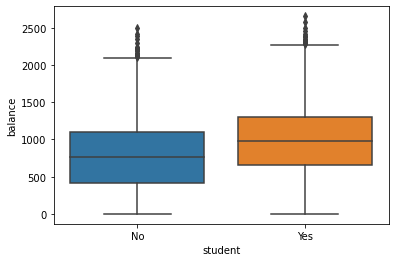

In [4]:
sns.boxplot(x=df['student'], y=df['balance'])

boxplot del ingreso total de cada cliente, segmentado por el status de
estudiante

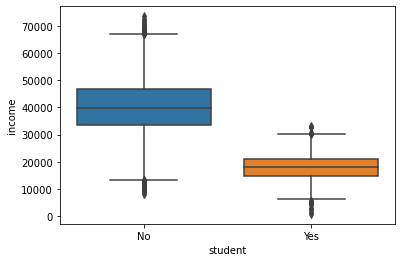

In [5]:
sns.boxplot(x=df['student'], y=df['income'])

boxplot del balance total de las cuentas, segmentado por el status de
default

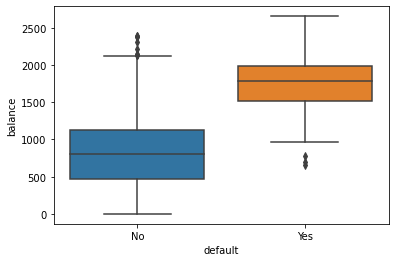

In [6]:
sns.boxplot(x=df['default'], y=df['balance'])

boxplot del ingreso total de cada cliente, segmentado por el status de
default

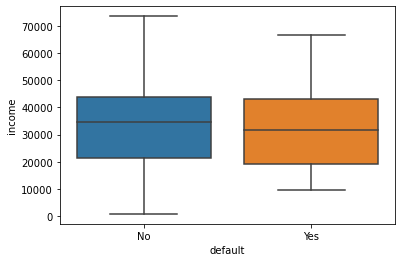

In [7]:
sns.boxplot(x=df['default'], y=df['income'])

diagrama de dispersión entre balance e income, segmentado por el status
de estudiante

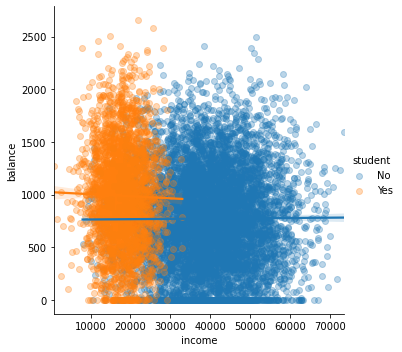

In [8]:
sns.lmplot(x='income', y='balance', data=df, hue='student', scatter_kws= {'alpha': 0.3})

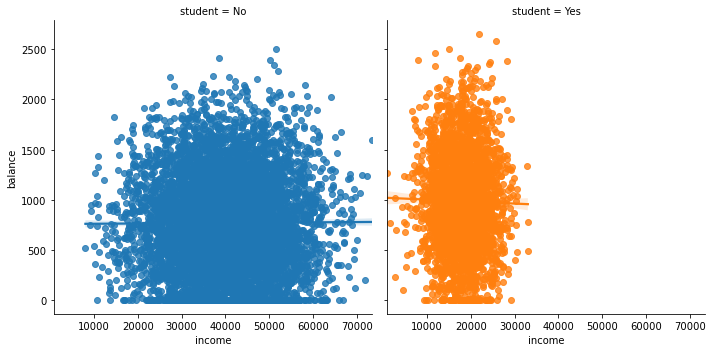

In [9]:
sns.lmplot(x='income', y='balance', col='student', data=df, hue='student')

diagrama de dispersión entre balance e income, segmentado por el status
de default

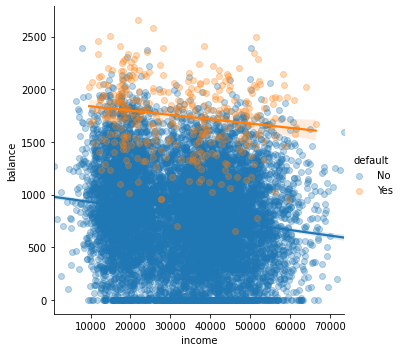

In [10]:
sns.lmplot(x='income', y='balance', data=df, hue='default', scatter_kws= {'alpha': 0.3})

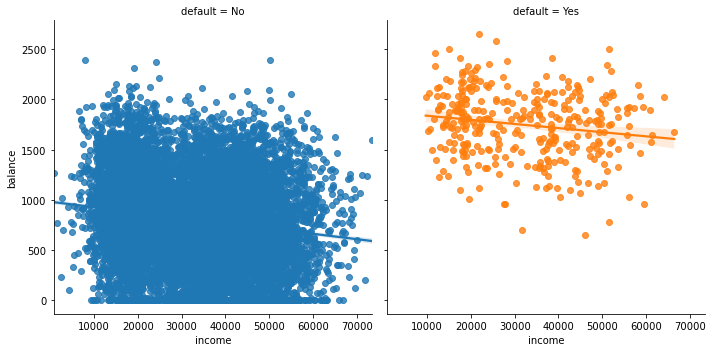

In [11]:
sns.lmplot(x='income', y='balance', col='default', data=df, hue='default')

##### Comente brevemente sobre los principales patrones de comportamiento

__R:__

## Desafío 3: Modelación econométrica

- Recodifique las variables student y default para que adquieran atributos numéricos.
- Implemente el siguiente modelo econométrico:
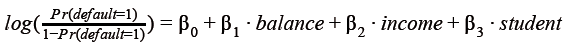
- A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

Recodificamos las variables binarias

In [12]:
df['student_recod'] = np.where(df['student']=='Yes', 1, 0)
df['default_recod'] = np.where(df['default']=='Yes', 1, 0)

In [39]:
df.head()

,default,student,balance,income,student_recod,default_recod
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [45]:
df['default_recod'].value_counts()


0    9667
1     333
Name: default_recod, dtype: int64

Implementamos el modelo 

In [14]:
modelo_logit = smf.logit('default_recod ~ balance + income + student_recod', df).fit()

modelo_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          default_recod   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.4619
Time:                        20:28:21   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance           0.0057      0.000     24.737      0.000       0.005       0.006
income         3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_recod    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
=================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Representamos el modelo:

In [97]:
def estimate_y_logit(a,b,c):
    estimate_y_logit = (modelo_logit.params['Intercept'] + modelo_logit.params['balance']*a 
                    + modelo_logit.params['income']*b + modelo_logit.params['student_recod']*c )
    invlogit = 1/(1+ np.exp(-estimate_y_logit))
    return estimate_y_logit, invlogit
estimate_y_logit(1000,1000,2)

(-6.423058113314301, 0.0016210511537889292)

De acuerdo al modelo obtenido, se observa que la variación de 'income -> ingreso promedio declarado por cliente' es casi despreciable por lo que su variación no afectaría en la morosidad del cliente. Lo mismo se puede decir de Student, si el cliente es estudiante o no, no afectaaría en la morosidad del cliente

In [98]:
modelo_logit_depurado = smf.logit('default_recod ~ balance', df).fit()

modelo_logit_depurado.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          default_recod   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.4534
Time:                        21:20:23   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [109]:
def estimate_y_logit_depurado(a):
    estimate_y_logit_depurado = (modelo_logit_depurado.params['Intercept'] + modelo_logit_depurado.params['balance']*a)
    invlogit = 1/(1+ np.exp(-estimate_y_logit_depurado))
    return estimate_y_logit_depurado, invlogit
estimate_y_logit_depurado(4000)

(11.34433711866056, 0.9999881638121788)

##### comente brevemente sobre el comportamiento de los atributos.

__R:__ 

## Desafío 4: Entrenar
A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
- Estandarize la matriz de atributos.
- Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
- Implemente el modelo sin alterar los hiper parámetros.
- Genere la predicción de las clases y de la probabilidad.
- Reporte las métricas de precisión, recall y f1 para ambas clases.
- Grafique la curva Receiver Operator Characteristic.
- En base a los pasos, comente sobre el desempeño predictivo del modelo.

##### Se genera subconjunto de entrenamiento y validación

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'balance':'student_recod'], df['default_recod'],
                                                   test_size= 0.33, random_state = 11238)

In [48]:
y_test.value_counts()

0    3186
1     114
Name: default_recod, dtype: int64

In [49]:
y_train.value_counts()

0    6481
1     219
Name: default_recod, dtype: int64

##### Se estandarizan las matrices

In [22]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

##### Se implementa el modelo

In [23]:
modelo_sin_alterar = LogisticRegression().fit(X_train_std, y_train)

##### Se genera la predicción de las clases y de la probabilidad.

In [31]:
predicho = modelo_sin_alterar.predict(X_test_std)
predicho

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
predicho_probabilidad = modelo_sin_alterar.predict_proba(X_test_std)
predicho_probabilidad

array([[9.99907560e-01, 9.24397830e-05],
       [9.98826855e-01, 1.17314545e-03],
       [9.99948175e-01, 5.18248199e-05],
       ...,
       [9.97393144e-01, 2.60685585e-03],
       [9.99060370e-01, 9.39629550e-04],
       [9.98480794e-01, 1.51920576e-03]])

##### Reporte las métricas de precisión, recall y f1 para ambas clases.

In [33]:
print(classification_report(y_test, predicho))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3186
           1       0.75      0.32      0.44       114

    accuracy                           0.97      3300
   macro avg       0.86      0.66      0.72      3300
weighted avg       0.97      0.97      0.97      3300



###### Grafique la curva Receiver Operator Characteristic.

In [35]:
false_positive, true_positive, threshold = roc_curve(y_test, predicho_probabilidad[:, 1])

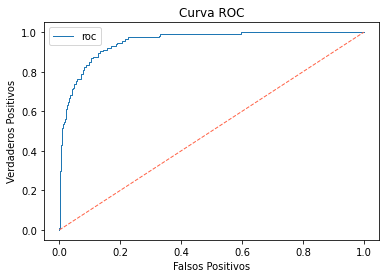

In [36]:
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1, label='roc')
plt.plot([0, 1], ls="--", lw=1, color='tomato')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');
plt.legend()

##### área debajo de la curva

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predicho_probabilidad[:, 1])

0.9530236451140406

##### comente sobre el desempeño predictivo del modelo.

__R:__ 

La cantidad de observaciones por clases está desbalanceada, hay mayor cantidad de observaciones de la clase 0 y menor de la clase 1. Teniendo en cuenta eso, se observa que el modelo tiene un buen desempeño para predecir la clase 0